### Creating ANN With Multi Node as Output (Classification)

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam , SGD,Adagrad


### Reading the Dataset

In [12]:
data = pd.read_csv('Datasets/iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [13]:
from sklearn.preprocessing import LabelEncoder 
varietys = LabelEncoder()

data['variety']  = varietys.fit_transform(data['variety'])

In [14]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Spliting into Feature and Target

In [18]:
x=data.drop('variety', axis = 1)
y=data['variety']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [69]:
model  = Sequential()

model.add(Dense(10,input_dim = 4,activation= 'relu',kernel_initializer='uniform'))
model.add(Dense(12,activation ='relu',kernel_initializer='uniform'))
model.add(Dense(15,activation= 'relu',kernel_initializer='uniform'))
model.add(Dense(20,activation ='relu'))

model.add(Dense(3,activation= 'softmax',kernel_initializer='uniform'))

callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',patience = 30)

model.compile(loss= 'sparse_categorical_crossentropy',optimizer = Adam(learning_rate =0.001),metrics = ['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 10)                50        
                                                                 
 dense_73 (Dense)            (None, 12)                132       
                                                                 
 dense_74 (Dense)            (None, 15)                195       
                                                                 
 dense_75 (Dense)            (None, 20)                320       
                                                                 
 dense_76 (Dense)            (None, 3)                 63        
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


### Traing the model

In [70]:
training_info = model.fit(x_train,y_train,batch_size=10,epochs=100,validation_data=(x_test,y_test),callbacks=callbacks)

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 1.0987 - accuracy: 0.3482 - val_loss: 1.0987 - val_accuracy: 0.2895
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0987 - accuracy: 0.2857 - val_loss: 1.0990 - val_accuracy: 0.2895
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0984 - accuracy: 0.3482 - val_loss: 1.0993 - val_accuracy: 0.2895
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.3482 - val_loss: 1.0994 - val_accuracy: 0.2895
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0978 - accuracy: 0.3482 - val_loss: 1.0992 - val_accuracy: 0.2895
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0966 - accuracy: 0.3482 - val_loss: 1.0980 - val_accuracy: 0.2895
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0930 - accuracy: 0.3571 - val_loss: 1.0936 - val_accuracy: 0.5789
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.9911 - val_loss: 0.1133 - val_accuracy: 0.9211
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9821 - val_loss: 0.1009 - val_accuracy: 0.9737
Epoch 61/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9911 - val_loss: 0.1092 - val_accuracy: 0.9211
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9911 - val_loss: 0.1008 - val_accuracy: 0.9211
Epoch 63/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9911 - val_loss: 0.0997 - val_accuracy: 0.9211
Epoch 64/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9911 - val_loss: 0.1033 - val_accuracy: 0.9211
Epoch 65/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0589 - accuracy: 0.9911 - val_loss: 0.1050 - val_accuracy: 0.9211
Epoch 

In [71]:
hist = training_info.history

### Training Loss vs Testing Loss

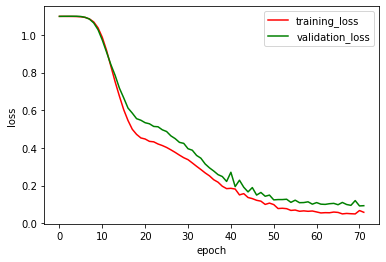

In [72]:
plt.plot(hist['loss'],label='training_loss',color='red')
plt.plot(hist['val_loss'],label='validation_loss',color='green')
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend()

### Training Accuracy vs Testing Accuracy

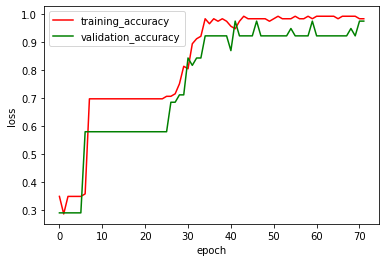

In [76]:
plt.plot(hist['accuracy'],label='training_accuracy',color='red')
plt.plot(hist['val_accuracy'],label='validation_accuracy',color='green')
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend()

### Model Prediction

In [77]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [75]:
y_pred

array([[9.99773920e-01, 2.26073040e-04, 1.00853170e-09],
       [1.29434702e-05, 5.04221678e-01, 4.95765448e-01],
       [1.16311558e-05, 5.11762619e-01, 4.88225698e-01],
       [2.13455030e-04, 9.82018232e-01, 1.77684054e-02],
       [7.20405235e-10, 1.94816221e-03, 9.98051882e-01],
       [7.84687989e-04, 9.95090485e-01, 4.12479276e-03],
       [4.08807409e-06, 3.07773352e-01, 6.92222595e-01],
       [9.99604404e-01, 3.95607640e-04, 3.95942568e-09],
       [6.54782308e-03, 9.90720153e-01, 2.73196050e-03],
       [1.34494277e-02, 9.84155774e-01, 2.39488995e-03],
       [9.99751031e-01, 2.48964177e-04, 1.26577371e-09],
       [9.99724567e-01, 2.75357306e-04, 1.58372560e-09],
       [9.99634147e-01, 3.65897926e-04, 3.10901371e-09],
       [1.46136135e-05, 5.85201085e-01, 4.14784342e-01],
       [9.99644995e-01, 3.55017168e-04, 3.03885161e-09],
       [4.26905375e-04, 9.92133379e-01, 7.43963383e-03],
       [9.53767127e-08, 6.23906404e-02, 9.37609255e-01],
       [4.09557259e-08, 2.91993

In [79]:
y_pred = np.argmax(y_pred,axis=1)

In [80]:
pd.DataFrame({'True Value' : y_test ,'Predicted Value' : y_pred })

,True Value,Predicted Value
28,0,0
72,1,1
70,1,1
85,1,1
128,2,2
65,1,1
127,2,2
42,0,0
81,1,1
93,1,1
